# Fashion Class Classification

## Convolutional Nueral Network/ Deep Learning
We want to build a model, in which the system processes fashion product images through multiple convolutional layers that extract hierarchical features from basic edges and textures in early layers to complex patterns and shapes in deeper layers. The CNN learns to distinguish between different fashion categories by identifying unique visual characteristics specific to each clothing type. Prime example of this, is the Amazon Echo Look Style Assistant. We'll be using Fashion-MNIST dataset, Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples.

There are 10 different classes of images, as following:
0: T-shirt/top;
1: Trouser;
2: Pullover;
3: Dress;
4: Coat;
5: Sandal;
6: Shirt;
7: Sneaker;
8: Bag;
9: Ankle boot.

Image dimmensions are 28x28.

The train set and test set are given in two separate datasets.

## Basic Review:
- A grayscale image is system of 256 tones with values ranging from 0 to 255.
- '0' represents black and '255' represents white.
- Numbers in-between represents grays between black and white.
- Binary systems use digits '0' and '1', where '00000000' for black to '11111111' for white (8-bit image).ipynb_checkpoints/

## Our Fashion Dataset
- Fashion dataset contains 28X28 grayscale image with values raging from 0 to 255.
- Each image is represented by a row with 784 values.

## Importing the data

In [86]:
#let's import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#we'll import the data
fashion_train_df=pd.read_csv('fashion-mnist_train.csv', sep=',')
fashion_test_df=pd.read_csv('fashion-mnist_test.csv', sep=',')

In [88]:
#let's view the first 5 rows of the dataframe
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#let's view the last 5 samples of the dataframe
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
#next, we'll explore the test dataframe
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#let's view the shape of training dataset 
fashion_train_df.shape

(60000, 785)

In [92]:
#let's view the shape of test dataset 
fashion_test_df.shape

(10000, 785)

## Visualization of the dataset

In [93]:
#let's create training and test arrays, so we can explore these arrays and actually view or visualize the data
training=np.array(fashion_train_df, dtype='float32')

In [94]:
#we'll do the same for testing dataset
testing=np.array(fashion_test_df, dtype='float32')

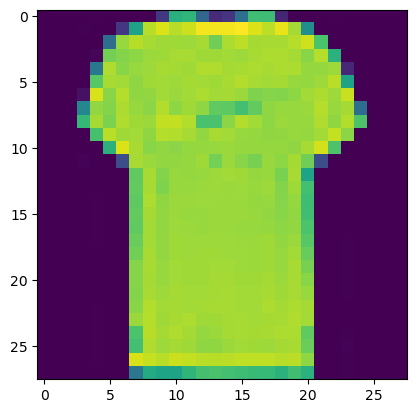

In [95]:
#let's visualize one image
plt.imshow(training[10, 1:].reshape(28,28))

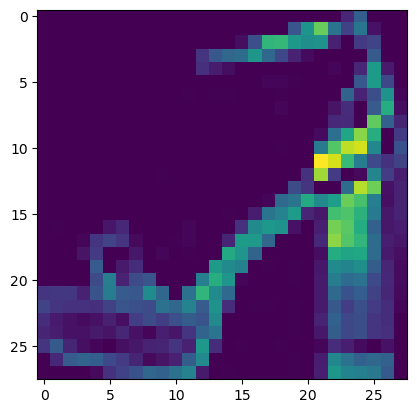

In [96]:
#we'll test this with random values, couple of numbers in the row since we have 60,000 datasets
import random
i=random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))

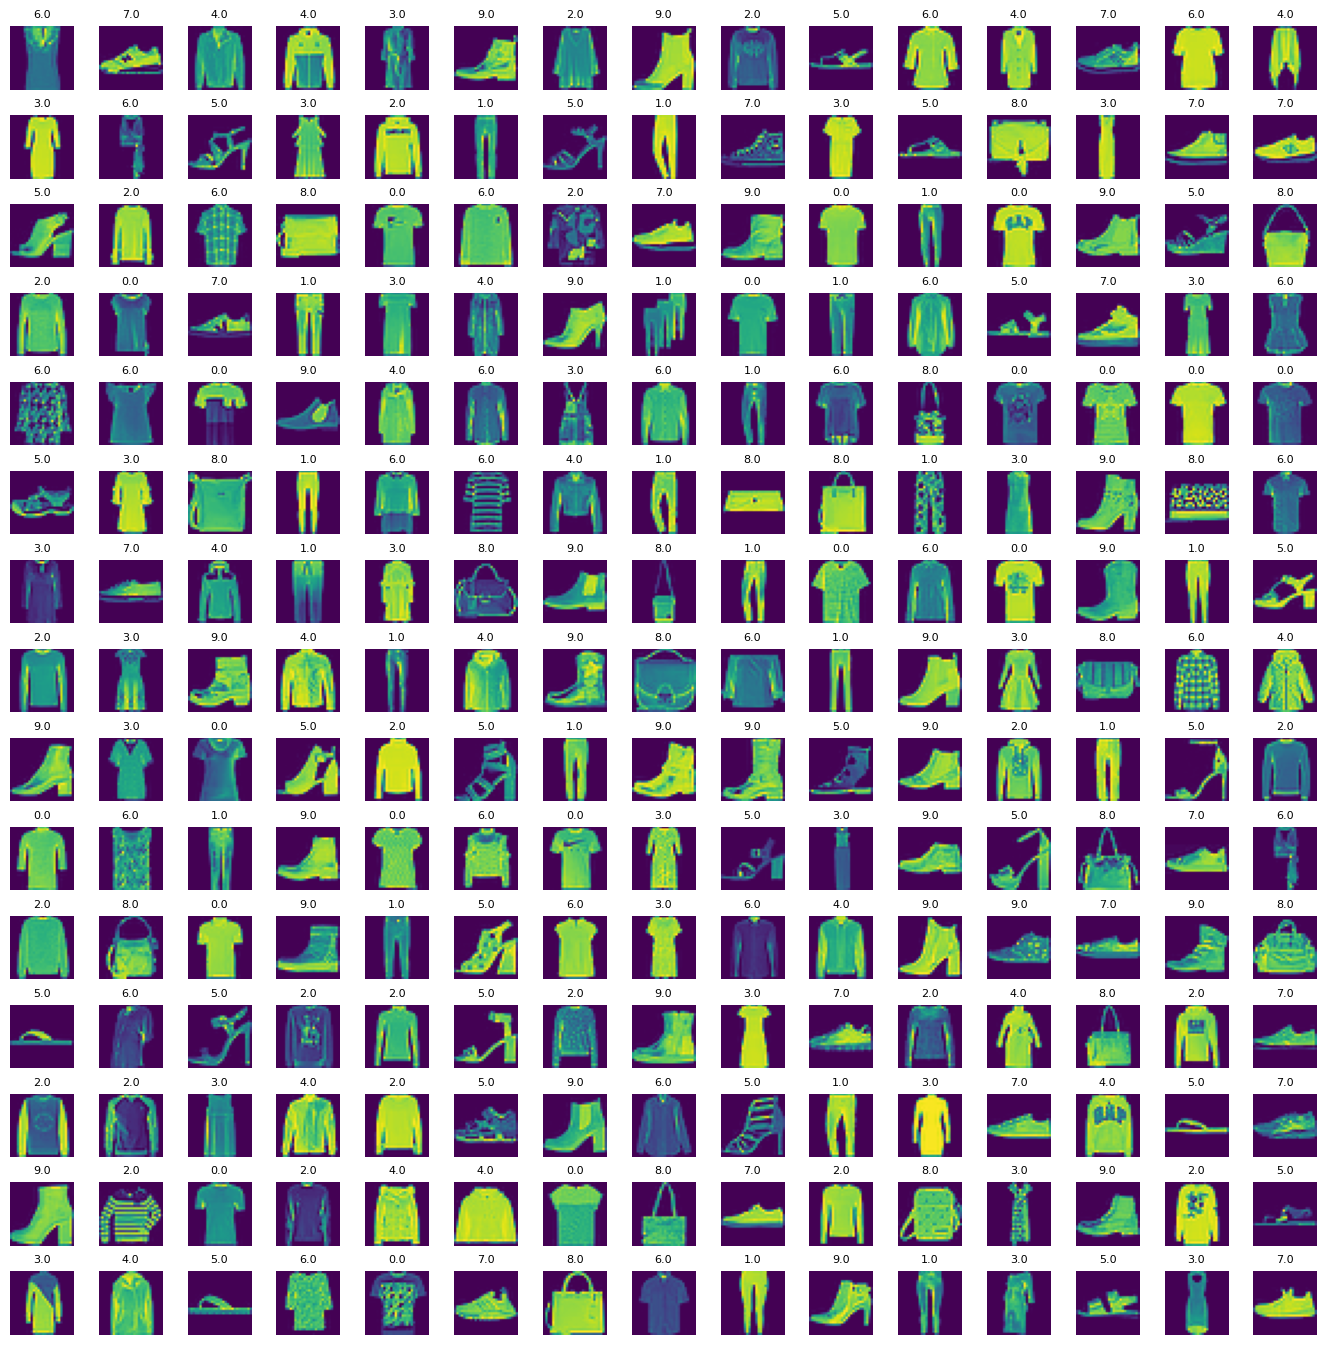

In [97]:
# we'll show the data in matrix format (in grid format)
# define the dimension of the plot grid
W_grid = 15
L_grid = 15

# subplot return the figure object and axes object
# we can use the axes object to plot specific figure at various locations
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

axes = axes.ravel()  # flatten the 15x15 matrix into 225 array
n_training = len(training)  # get the length of the training dataset

# loop through each subplot position
for i in range(W_grid * L_grid):  # create loop for all 225 positions
    # select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Model training

- we're going to use a type of neural network called Convolutional Neural Network.

### Artificial Neural Network Basics
- The neuron collects signals from input chanels named dendrites, processes information in its nucleus, and then generates an output in a long thin branch called the axon.
- Human learning occurs adaptively by varying the bond strength between these neurons

### Convolutional Neural Network - Feature Detector
The feature detector (also called a filter or kernel) is a small matrix that slides across the input image to detect specific features.

How it works:
- It's typically a 3×3, 5×5, or 7×7 matrix of weights
- The detector performs element-wise multiplication with corresponding pixels in the image
- It slides across the entire image (convolution operation)
- Different detectors can identify different features: edges, corners, textures, shapes

The purpose is to extract meaningful features from raw pixel data automatically, rather than manually engineering features.

### Convolutional Neural Network - ReLU
ReLU (Rectified Linear Unit) is an activation function applied after convolution to introduce non-linearity.

Mathematical function:
- ReLU(x) = max(0, x)
- If input is positive, output = input
- If input is negative or zero, output = 0

Why it's important:
- Removes negative values: Only keeps positive activations
- Introduces non-linearity: Allows the network to learn complex patterns
- Computationally efficient: Simple comparison operation
- Reduces vanishing gradient problem: Doesn't saturate for positive values

It makes makes the feature maps more sparse and helps the network focus on the most important features.

###  Convolutional Neural Network - Max Pooling
Max pooling is a downsampling technique that reduces the spatial dimensions of feature maps.

How it works:
- Takes a small window (typically 2×2)
- Slides across the feature map
- Selects the maximum value in each window
- Reduces the size by the pooling factor (2×2 pooling reduces size by half)

Benefits:
- Reduces computational load: Smaller feature maps = fewer parameters
- Translation invariance: Small shifts in input don't drastically change output
-  Retains important features: Keeps the strongest activations
-  Reduces overfitting: Acts as a form of regularization

For example: A 4×4 feature map becomes 2×2 after 2×2 max pooling.

### Convolutional Neural Network - Flattening
Flattening converts the multi-dimensional feature maps into a 1D vector for input to fully connected layers.

Process:
- Takes the final convolutional/pooling layer output (e.g., 7×7×64 feature maps)
- Reshapes it into a single column vector (e.g., 3,136×1)
- No information is lost, just reorganized

In [98]:
#let's begin with the training, we'll prepare X_train, X_test, y_train and y_test datasets
X_train=training[:, 1:]/255
y_train=training[:, 0]

In [99]:
#we'll do the same for testing dataset
X_test=testing[:, 1:]/255
y_test=testing[:, 0]

In [100]:
#we'll need to develop the validation dataset, this helps the model generalize, as we want the model to avoid overfitting.
#let's import the train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [102]:
#we'll reshape our data to be in form of 28 by 28 by 1, that's the form our convolutional neural is going to accept.
X_train=X_train.reshape(X_train.shape[0], *(28,28,1))
X_test=X_test.reshape(X_test.shape[0], *(28,28,1))
X_val=X_val.reshape(X_val.shape[0], *(28,28,1))

In [103]:
#let's take a look at the shape of our X_train
X_train.shape

(48000, 28, 28, 1)

In [104]:
#we'll to the same for X_test
X_test.shape

(10000, 28, 28, 1)

In [105]:
#we'll do the same for X_val
X_val.shape

(12000, 28, 28, 1)

In [106]:
#we can now go ahead to train our model, but first, we'll import an open source neural network library called keras
!pip install tensorflow

In [107]:
from tensorflow import keras

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [109]:
# Create the CNN model
cnn_model = Sequential()

# First Convolutional Layer
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening
cnn_model.add(Flatten())

# Dense layers
cnn_model.add(Dense(units=128, activation='relu'))  # Correct syntax
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(units=64, activation='relu'))   # Correct syntax
cnn_model.add(Dense(units=10, activation='softmax')) # Output layer for 10 fashion classes

# Compile the model
cnn_model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

# View model architecture
cnn_model.summary()

C:\Users\HP\anaconda3\envs\Python__Experiment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,090 (461.29 KB)

 Trainable params: 118,090 (461.29 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
#we want to fit our model
epochs=50
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             epochs=epochs,
             verbose=1,
             validation_data=(X_val, y_val))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - accuracy: 0.3696 - loss: 1.6984 - val_accuracy: 0.7452 - val_loss: 0.6703
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.7343 - loss: 0.7205 - val_accuracy: 0.7867 - val_loss: 0.5807
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step - accuracy: 0.7792 - loss: 0.6115 - val_accuracy: 0.7970 - val_loss: 0.5418
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.7965 - loss: 0.5614 - val_accuracy: 0.8254 - val_loss: 0.4755
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 183ms/step - accuracy: 0.8116 - loss: 0.5170 - val_accuracy: 0.8317 - val_loss: 0.4516
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 167ms/step - accuracy: 0.8251 - loss: 0.4851 - val_accuracy: 0.8440 - val_loss: 0.4256
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - accuracy: 0.8382 - loss: 0.4491 - val_accuracy: 0.8460 - val_loss: 0.4173
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 237ms/step - accuracy: 0.8439 - loss: 0.4323 - val_accu

## Evaluating the model 

In [111]:
#we're going to evaluate the model using our testing datasets
evaluation=cnn_model.evaluate(X_test, y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8976 - loss: 0.3691 
Test Accuracy:0.900


In [112]:
#next, we're doing the prediction 
# Get predictions (probabilities for each class)
predictions = cnn_model.predict(X_test)

# Convert probabilities to class predictions
predicted_classes = np.argmax(predictions, axis=1)

print("Predicted classes shape:", predicted_classes.shape)
print("First 10 predictions:", predicted_classes[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step 
Predicted classes shape: (10000,)
First 10 predictions: [0 1 2 6 3 6 8 6 5 0]


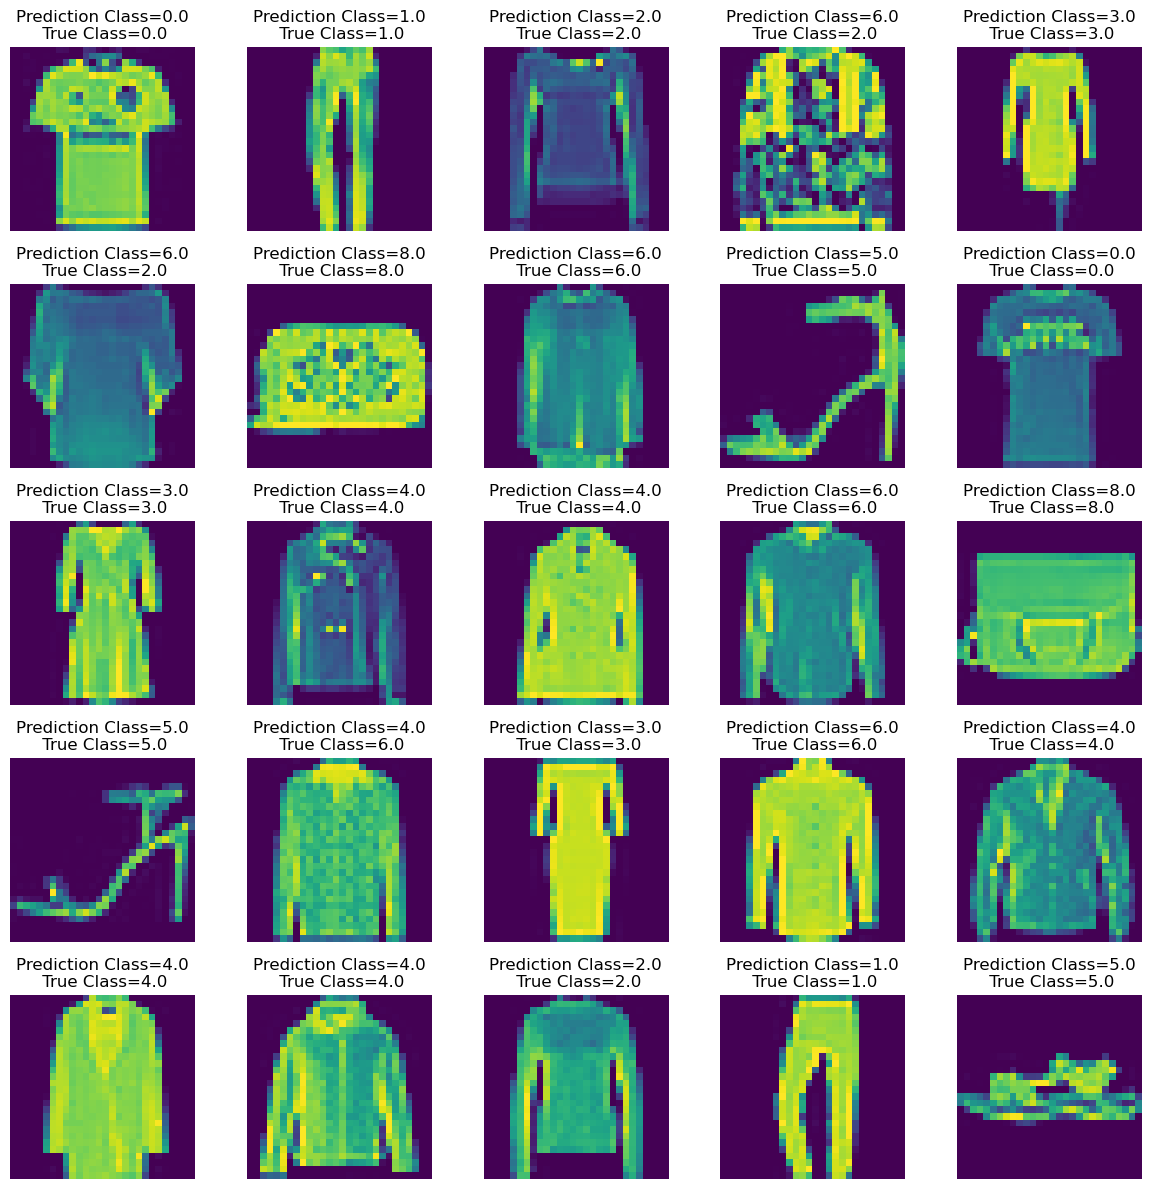

In [113]:
#let's print a grid, that can tell us if the image is true label or a predicted label
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(L * W):  # np.arange() creates a range
    axes[i].imshow(X_test[i].reshape(28, 28))
    axes[i].set_title('Prediction Class={:0.1f}\n True Class={:0.1f}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [114]:
#let's check our confusion matrix
from sklearn.metrics import confusion_matrix

<Axes: >

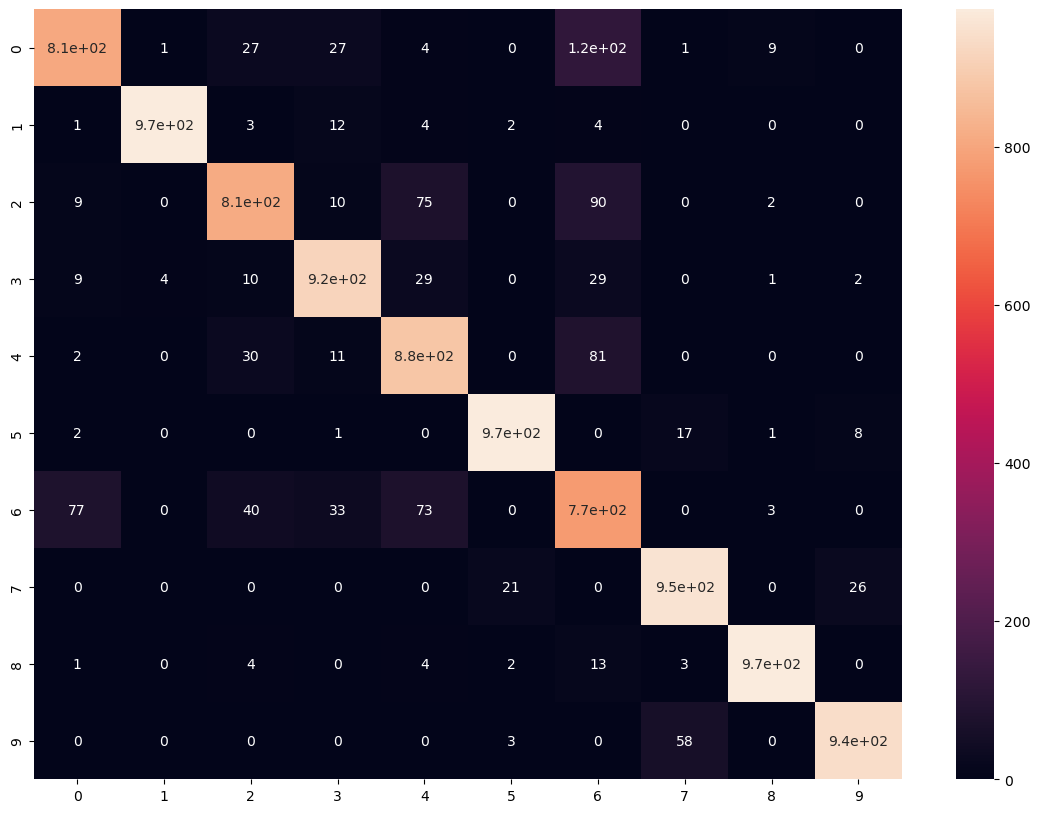

In [115]:
cm=confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

- this shows us number of samples that has been correctly classified and samples misclassified.

In [116]:
#let's plot our report
from sklearn.metrics import classification_report

In [117]:
num_classes=10
target_names=['Class{}'.format(i) for i in range (num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

      Class0       0.89      0.81      0.85      1000
      Class1       0.99      0.97      0.98      1000
      Class2       0.88      0.81      0.84      1000
      Class3       0.91      0.92      0.91      1000
      Class4       0.82      0.88      0.85      1000
      Class5       0.97      0.97      0.97      1000
      Class6       0.69      0.77      0.73      1000
      Class7       0.92      0.95      0.94      1000
      Class8       0.98      0.97      0.98      1000
      Class9       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



- this shows us classes which was classified correctly.

## Improving the model 

In [118]:
#let's improve the model by adding dropouts. This is a reguralization technique for reducing overfitting in neural networks, it enables training to occur on several architecture of the neural network.

# Create the CNN model with dropout layers
cnn_model = Sequential()

# First Convolutional Block
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))  # Light dropout after first conv block

# Second Convolutional Block
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))  # Light dropout after second conv block

# Third Convolutional Block
cnn_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))  # Light dropout after third conv block

# Flattening
cnn_model.add(Flatten())

# Dense layers with stronger dropout
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.5))   # Higher dropout for dense layers

cnn_model.add(Dense(units=64, activation='relu'))
cnn_model.add(Dropout(0.5))   # Higher dropout for dense layers

# Output layer (no dropout before final layer)
cnn_model.add(Dense(units=10, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display model architecture
print("Model Architecture with Dropout Layers:")
cnn_model.summary()

# Additional model information
print(f"\nTotal trainable parameters: {cnn_model.count_params():,}")
print("Dropout strategy: Light dropout (0.25) after conv blocks, stronger dropout (0.5) in dense layers")

C:\Users\HP\anaconda3\envs\Python__Experiment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Architecture with Dropout Layers:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,090 (461.29 KB)

 Trainable params: 118,090 (461.29 KB)

 Non-trainable params: 0 (0.00 B)


Total trainable parameters: 118,090
Dropout strategy: Light dropout (0.25) after conv blocks, stronger dropout (0.5) in dense layers


In [119]:
#we want to fit our model
epochs=50
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             epochs=epochs,
             verbose=1,
             validation_data=(X_val, y_val))

Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 33s 295ms/step - accuracy: 0.2544 - loss: 1.9554 - val_accuracy: 0.6961 - val_loss: 0.8665
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 194ms/step - accuracy: 0.6298 - loss: 1.0070 - val_accuracy: 0.7598 - val_loss: 0.6377
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.7066 - loss: 0.8033 - val_accuracy: 0.7767 - val_loss: 0.5884
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 285ms/step - accuracy: 0.7396 - loss: 0.7197 - val_accuracy: 0.7892 - val_loss: 0.5451
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.7558 - loss: 0.6639 - val_accuracy: 0.7983 - val_loss: 0.5217
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 207ms/step - accuracy: 0.7704 - loss: 0.6426 - val_accuracy: 0.8114 - val_loss: 0.4997
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.7857 - loss: 0.6024 - val_accuracy: 0.8139 - val_loss: 0.4843
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.7902 - loss: 0.5864 - val_accu

## Re-evaluating the model 

In [120]:
#we're going to re-evaluate the model using our testing datasets
evaluation=cnn_model.evaluate(X_test, y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9006 - loss: 0.2819
Test Accuracy:0.903


In [122]:
#let's check the clclassification_report
num_classes=10
target_names=['Class{}'.format(i) for i in range (num_classes)]

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

      Class0       0.89      0.81      0.85      1000
      Class1       0.99      0.97      0.98      1000
      Class2       0.88      0.81      0.84      1000
      Class3       0.91      0.92      0.91      1000
      Class4       0.82      0.88      0.85      1000
      Class5       0.97      0.97      0.97      1000
      Class6       0.69      0.77      0.73      1000
      Class7       0.92      0.95      0.94      1000
      Class8       0.98      0.97      0.98      1000
      Class9       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## Conclusion

- With a complex sequential model with multiple convolution layers and 50 epochs for the training, we obtained an accuracy ~0.90 for test prediction. After investigating the validation accuracy and loss, we understood that the model is overfitting.
We retrained the model with Dropout layers to the model to reduce overfitting.
We confirmed the model improvement and with the same number of epochs for the training we obtained with the new model an accuracy of ~0.91 for test prediction. Only few classes are not correctly classified all the time, especially Class 6 (Shirt).